In [67]:
import pandas as pd
import os

def processar_ficheiro(caminho_ficheiro, header=4, pasta_saida='.'):
    nome_base = os.path.splitext(os.path.basename(caminho_ficheiro))[0]
    
    # Lê o ficheiro
    df = pd.read_excel(caminho_ficheiro, header=header)
    
    # Limpa espaços e converte os nomes das colunas para string
    df.columns = df.columns.map(str).str.strip()

    # Renomeia as duas primeiras colunas (assumindo que têm dados úteis)
    if len(df.columns) >= 2:
        df.columns.values[0] = 'local'
        df.columns.values[1] = 'codigo'

    # Remove colunas que começam com "Unnamed"
    df = df.loc[:, ~df.columns.str.startswith('Unnamed')]

    # Remove linhas onde todas as colunas exceto a primeira são NaN
    df = df[~df.iloc[:, 1:].isna().all(axis=1)]

    # Salva como CSV
    caminho_csv = os.path.join(pasta_saida, f'{nome_base}.csv')
    df.to_csv(caminho_csv, index=False)

    return df  

df_populacao = processar_ficheiro('./população.xls',2)
print(df_populacao)

                 local   codigo        HM        H        M
0             Portugal       PT  10639726  5083568  5556158
1           Continente        1  10142079  4844936  5297143
2                Norte       11   3673861  1759847  1914014
3           Alto Minho      111    234215   111056   123159
4    Arcos de Valdevez  1111601     20859     9689    11170
..                 ...      ...       ...      ...      ...
342      Ribeira Brava  3003107     13080     6033     7047
343         Santa Cruz  3003108     44178    21170    23008
344            Santana  3003109      6488     2993     3495
345        São Vicente  3003110      4972     2321     2651
346        Porto Santo  3003201      5562     2741     2821

[347 rows x 5 columns]


#### Súbsidios de Desemprego

In [72]:

df_desemprego = processar_ficheiro('./VPAO0K506sWhwpRsSujRSoapFz25H5JbmuG2dk8G_39537.xls',4)



In [ ]:
#Merge dos dois DataFrames com base em 'codigo'
df_merged = pd.merge(df_desemprego, df_populacao, on='codigo', suffixes=('_desemprego', '_pop'))

# Calcula as colunas normalizadas (percentagens da população)
df_merged['HM_norm'] = df_merged['HM_desemprego'] / df_merged['HM_pop']
df_merged['H_norm'] = df_merged['H_desemprego'] / df_merged['H_pop']
df_merged['M'] = df_merged['M_desemprego'] / df_merged['M_pop']

# Seleciona apenas as colunas úteis para o DataFrame final
df_desemprego = df_merged[['local_desemprego', 'codigo', 'HM_norm', 'H_norm', 'M_norm']]

print(df_desemprego_norm)


      local_desemprego   codigo   HM_norm    H_norm    M_norm
0             Portugal       PT  0.031507  0.028637  0.034132
1           Continente        1  0.031428  0.028413  0.034186
2                Norte       11  0.031895  0.028068  0.035413
3           Alto Minho      111  0.025575  0.024348  0.026681
4    Arcos de Valdevez  1111601  0.018026  0.014243  0.021307
..                 ...      ...       ...       ...       ...
146        Porto Santo  3003201  0.054657  0.049617  0.059553
147      Ribeira Brava  3003107  0.025612  0.023206  0.027671
148         Santa Cruz  3003108  0.028521  0.026594  0.030294
149            Santana  3003109  0.024507  0.028065  0.021459
150        São Vicente  3003110  0.020917  0.021542  0.020370

[151 rows x 5 columns]


/var/folders/0q/ysq7ngqx1p5d0wj8y5tm8mr80000gn/T/ipykernel_6125/2712360797.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_desemprego_norm['cluster'] = kmeans.fit_predict(X)


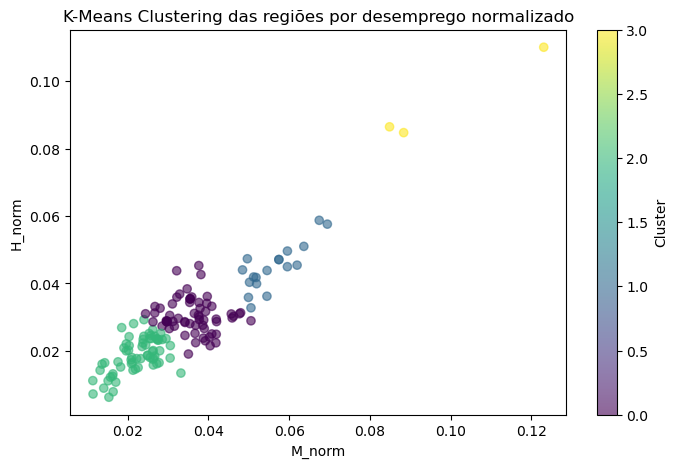

In [76]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Subconjunto com as colunas a usar
X = df_desemprego_norm[['HM_norm', 'H_norm', 'M_norm']].copy()

# Aplica KMeans diretamente
kmeans = KMeans(n_clusters=4, random_state=42)
df_desemprego_norm['cluster'] = kmeans.fit_predict(X)

# Visualização
plt.figure(figsize=(8, 5))
plt.scatter(X['M_norm'], X['H_norm'], c=df_desemprego_norm['cluster'], cmap='viridis', alpha=0.6)
plt.xlabel('M_norm')
plt.ylabel('H_norm')
plt.title('K-Means Clustering das regiões por desemprego normalizado')
plt.colorbar(label='Cluster')
plt.show()


#### Duração Subsídio de desemprego

In [ ]:
df5 = processar_ficheiro('./Duração média do subsídio de desemprego.xls',4)
df5

,local,codigo,HM,H,M
0,Portugal,PT,172.0,167.0,175.0
1,Continente,1,171.0,167.0,175.0
2,Norte,11,178.0,175.0,180.0
3,Alto Minho,111,154.0,146.0,161.0
4,Arcos de Valdevez,1111601,150.0,139.0,156.0
...,...,...,...,...,...
342,Ribeira Brava,3003107,164.0,170.0,160.0
343,Santa Cruz,3003108,180.0,181.0,180.0
344,Santana,3003109,169.0,168.0,170.0
345,São Vicente,3003110,176.0,197.0,162.0


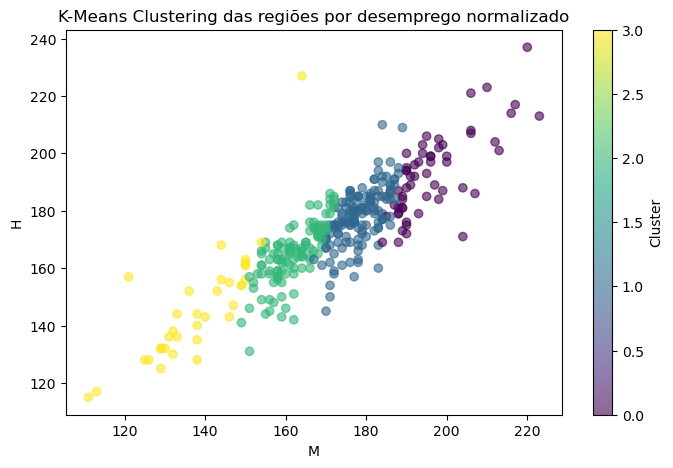

In [98]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Subconjunto com as colunas a usar
X = df5[['HM', 'H', 'M']].copy()

# Aplica KMeans diretamente
kmeans = KMeans(n_clusters=4, random_state=42)
df5['cluster'] = kmeans.fit_predict(X)

# Visualização
plt.figure(figsize=(8, 5))
plt.scatter(X['HM'], X['M'], c=df5['cluster'], cmap='viridis', alpha=0.6)
plt.xlabel('M')
plt.ylabel('H')
plt.title('K-Means Clustering das regiões por desemprego normalizado')
plt.colorbar(label='Cluster')
plt.show()


In [ ]:
#df3 = processar_ficheiro('./Beneficiários de subsídios de desemprego com Grupo etário.xls',4)

### Rendimento Social

In [ ]:

df2= processar_ficheiro('./Beneficiários do rendimento social de inserção - 1000 habitantes em idade ativa.xls',2)
print(df2)

                 local   codigo  Total_2022
0             Portugal       PT       28.88
1           Continente        1       27.87
2                Norte       11       28.94
3           Alto Minho      111       13.78
4    Arcos de Valdevez  1111601        9.37
..                 ...      ...         ...
339        Porto Santo  3003201       11.37
340      Ribeira Brava  3003107       23.84
341         Santa Cruz  3003108       20.58
342            Santana  3003109       41.08
343        São Vicente  3003110       21.51

[344 rows x 3 columns]


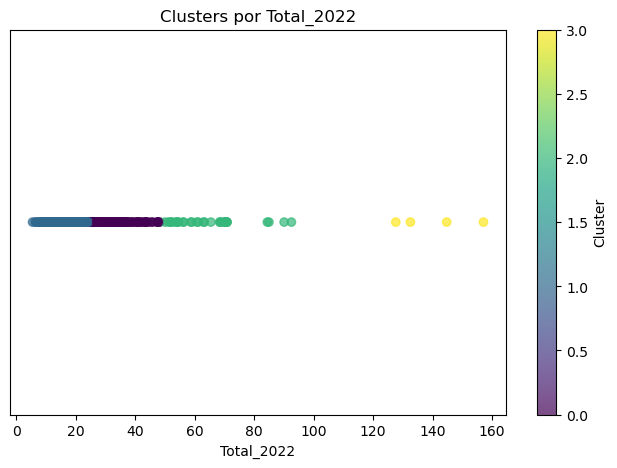

In [78]:
X = df2[['Total_2022']].values  # formato (n_samples, 1)

# Aplica KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
df2['cluster'] = kmeans.fit_predict(X)

# Visualização simples
plt.figure(figsize=(8, 5))
plt.scatter(df2['Total_2022'], [0]*len(df2), c=df2['cluster'], cmap='viridis', alpha=0.7)
plt.xlabel('Total_2022')
plt.title('Clusters por Total_2022')
plt.yticks([])  # remove eixo y, pois só temos uma dimensão
plt.colorbar(label='Cluster')
plt.show()

#### Bnefeciários Abono Família 

In [84]:
df_ben_abono_fam = processar_ficheiro('./Beneficiários do abono de família para crianças e jovens da segurança social.xls',0)
print(df_ben_abono_fam)

                 local   codigo  Beneficiarios
0             Portugal       PT       817200.0
1           Continente        1       770574.0
2                Norte       11       280030.0
3           Alto Minho      111        17254.0
4    Arcos de Valdevez  1111601         1405.0
..                 ...      ...            ...
342      Ribeira Brava  3003107         1134.0
343         Santa Cruz  3003108         3609.0
344            Santana  3003109          467.0
345        São Vicente  3003110          319.0
346        Porto Santo  3003201          361.0

[347 rows x 3 columns]


In [91]:
import pandas as pd

df_merged = pd.merge(df_ben_abono_fam, df_populacao, on='codigo')

df_merged = df_merged[df_merged['HM'] != 0]

df_merged['Beneficiarios_norm'] = df_merged['Beneficiarios'] / df_merged['HM']

df_ben_fam_norm = df_merged[['local_x', 'codigo', 'Beneficiarios_norm']].rename(columns={'local_x': 'local'})

print(df_ben_fam_norm)


                 local   codigo  Beneficiarios_norm
0             Portugal       PT            0.076806
1           Continente        1            0.075978
2                Norte       11            0.076222
3           Alto Minho      111            0.073667
4    Arcos de Valdevez  1111601            0.067357
..                 ...      ...                 ...
342      Ribeira Brava  3003107            0.086697
343         Santa Cruz  3003108            0.081692
344            Santana  3003109            0.071979
345        São Vicente  3003110            0.064159
346        Porto Santo  3003201            0.064905

[347 rows x 3 columns]


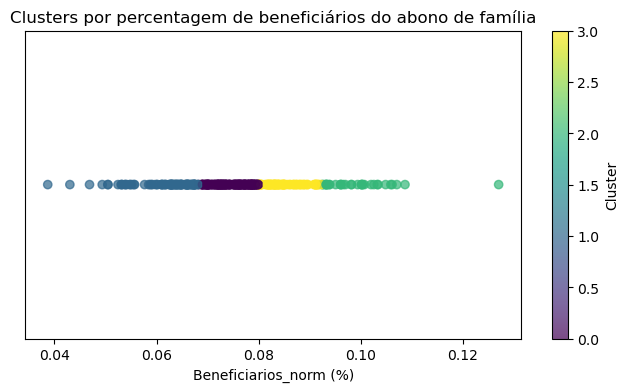

In [92]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Seleciona os dados a agrupar
X = df_ben_fam_norm[['Beneficiarios_norm']].values  # formato (n_samples, 1)

# Aplica KMeans com, por exemplo, 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
df_ben_fam_norm['cluster'] = kmeans.fit_predict(X)

# Visualização 1D dos clusters
plt.figure(figsize=(8, 4))
plt.scatter(df_ben_fam_norm['Beneficiarios_norm'], [0]*len(df_ben_fam_norm), 
            c=df_ben_fam_norm['cluster'], cmap='viridis', alpha=0.7)
plt.xlabel('Beneficiarios_norm (%)')
plt.title('Clusters por percentagem de beneficiários do abono de família')
plt.yticks([])  # Eixo Y sem valor, pois é 1D
plt.colorbar(label='Cluster')
plt.show()


#### Valor Médio das Pensões

In [104]:

df_pensoes = processar_ficheiro('./Valor médio das pensões da segurança social (€: N.º).xls',4)
print(df_pensoes)

                 local   codigo   Total  Invalidez  Velhice  Sobrevivência
0             Portugal       PT  6452.0     6051.0   7424.0         3806.0
1           Continente        1  6483.0     6041.0   7450.0         3825.0
2                Norte       11  5978.0     5571.0   6848.0         3543.0
3           Alto Minho      111  4984.0     5178.0   5653.0         3013.0
4    Arcos de Valdevez  1111601  4027.0     4577.0   4502.0         2641.0
..                 ...      ...     ...        ...      ...            ...
342      Ribeira Brava  3003107  4815.0     5640.0   5519.0         2653.0
343         Santa Cruz  3003108  5638.0     6194.0   6551.0         3350.0
344            Santana  3003109  4337.0     5322.0   5003.0         2621.0
345        São Vicente  3003110  4376.0     4749.0   5102.0         2695.0
346        Porto Santo  3003201  7019.0     5934.0   8467.0         3734.0

[347 rows x 6 columns]


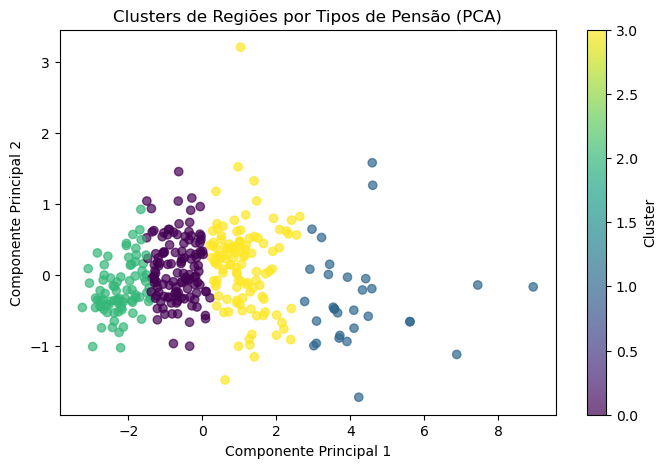

In [105]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

# Supondo que tens o DataFrame chamado df_pensoes
df_numerico = df_pensoes[['Total', 'Invalidez', 'Velhice', 'Sobrevivência']].copy()

# Normaliza os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numerico)

# Aplica o KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
df_pensoes['cluster'] = kmeans.fit_predict(X_scaled)

# Visualiza os clusters com um gráfico 2D (reduzido para 2 componentes principais com PCA, opcional)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_pensoes['cluster'], cmap='viridis', alpha=0.7)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clusters de Regiões por Tipos de Pensão (PCA)')
plt.colorbar(label='Cluster')
plt.show()


In [107]:
for i in sorted(df_pensoes['cluster'].unique()):
    print(f"\nCluster {i}:")
    print(df_pensoes[df_pensoes['cluster'] == i][['local', 'Total', 'cluster']])



Cluster 0:
                    local   Total  cluster
3              Alto Minho  4984.0        0
5                 Caminha  5410.0        0
14                 Cávado  5591.0        0
16               Barcelos  5454.0        0
18              Esposende  5329.0        0
..                    ...     ...      ...
328     São Roque do Pico  4822.0        0
329                 Velas  5025.0        0
332  Vila Franca do Campo  4878.0        0
337       Câmara de Lobos  4828.0        0
342         Ribeira Brava  4815.0        0

[123 rows x 3 columns]

Cluster 1:
                    local    Total  cluster
34                   Maia   7375.0        1
35             Matosinhos   7758.0        1
38                  Porto   8059.0        1
137        Marinha Grande   7591.0        1
185     Arruda dos Vinhos   6908.0        1
199         Entroncamento   7317.0        1
219         Grande Lisboa   8618.0        1
220         Grande Lisboa   8618.0        1
221               Amadora   7606.0      

#### RSI


In [109]:

df_rsi = processar_ficheiro('./Valor processado do rendimento social de inserção.xls',2)
print(df_rsi)

                 local   codigo     valor
0             Portugal       PT  322242.0
1           Continente        1  302887.0
2                Norte       11  118497.0
3           Alto Minho      111    3820.0
4    Arcos de Valdevez  1111601     271.0
..                 ...      ...       ...
342      Ribeira Brava  3003107     230.0
343         Santa Cruz  3003108     550.0
344            Santana  3003109     252.0
345        São Vicente  3003110     148.0
346        Porto Santo  3003201      69.0

[347 rows x 3 columns]


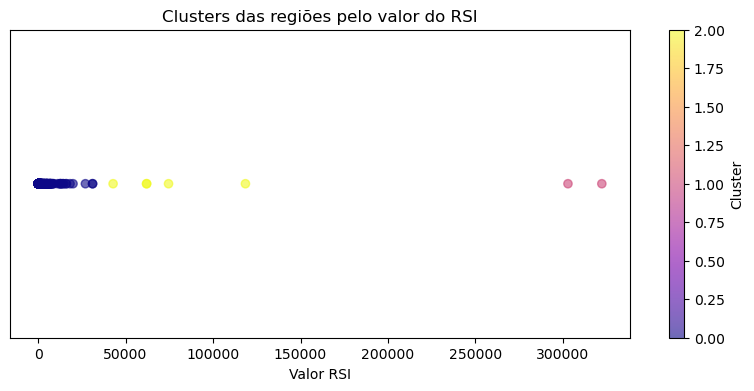

In [111]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_rsi[['valor']])

# Aplica KMeans com, por exemplo, 4 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df_rsi['cluster'] = kmeans.fit_predict(X_scaled)

# Visualiza os resultados
plt.figure(figsize=(10, 4))
plt.scatter(df_rsi['valor'], [0]*len(df_rsi), c=df_rsi['cluster'], cmap='plasma', alpha=0.6)
plt.xlabel('Valor RSI')
plt.title('Clusters das regiões pelo valor do RSI')
plt.yticks([])
plt.colorbar(label='Cluster')
plt.show()